### Imports y dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pgmpy.estimators import BicScore, K2Score, AICScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BayesianEstimator

import networkx as nx

numberOfSamplesPerDataset = 200

In [2]:
data1 = pd.read_csv("/home/joaquin/Documents/Asignaturas/TFG UCO/Introduction-to-Causal-Inference/datasets/heart-disease(320k_rows)/2022/heart_2022_no_nans.csv")
data2 = pd.read_csv("/home/joaquin/Documents/Asignaturas/TFG UCO/Introduction-to-Causal-Inference/datasets/Agriculture Crop Yield(1M_rows)/crop_yield.csv")

datasets = {'Heart disease': data1, 'Agriculture Crop Yield': data2}

In [3]:
for dataset in datasets.values():
    # Drop non categorical columns
    dataset.drop(dataset.dtypes[dataset.dtypes.apply(lambda x: x not in (bool, object))].index, axis=1, inplace=True)
    
# Stay with just a sample of each dataset
datasets = {key: df.sample(n=numberOfSamplesPerDataset, random_state=0) for key, df in datasets.items()}

## Algorithms

### Hill Climbing

In [4]:
models_hc = {}
for name, dataset in datasets.items():
    hc = HillClimbSearch(dataset)
    models_hc[name] = hc.estimate(scoring_method=BicScore(dataset), epsilon=0.01, max_iter=100)
    print(f"'{name}' dataset finished")

  0%|          | 0/100 [00:00<?, ?it/s]

'Heart disease' dataset finished


  0%|          | 0/100 [00:00<?, ?it/s]

'Agriculture Crop Yield' dataset finished


### PC

In [5]:
from pgmpy.estimators import PC

models_pc = {}
for name, dataset in datasets.items():
    pc = PC(dataset)
    models_pc[name] = pc.estimate(significance_level=0.1)
    print(f"'{name}' dataset finished")

  0%|          | 0/5 [00:00<?, ?it/s]

'Heart disease' dataset finished


  0%|          | 0/5 [00:00<?, ?it/s]

'Agriculture Crop Yield' dataset finished


## Scores

In [7]:
def printScoreForModels(datasets, score):
    for name, dataset in datasets.items():
        print('********************************************')
        print(f"Dataset: {name}")
        print(f"{score.__name__} from HillClimbSearch: {score(dataset).score(models_hc[name])}")
        print(f"{score.__name__} from PC: {score(dataset).score(models_pc[name])}")
        # print(f"{score.__name__} from GES: {score(dataset).score(models_ges[name])}")
    
printScoreForModels(datasets, BicScore)
print('\n')
printScoreForModels(datasets, K2Score)
print('\n')
printScoreForModels(datasets, AICScore)

********************************************
Dataset: Heart disease
BicScore from HillClimbSearch: -4943.297219091195
BicScore from PC: -5718.70999588342
********************************************
Dataset: Agriculture Crop Yield
BicScore from HillClimbSearch: -1524.3060970387737
BicScore from PC: -1532.4913282031068


********************************************
Dataset: Heart disease
K2Score from HillClimbSearch: -4809.478161722633
K2Score from PC: -4930.824756211887
********************************************
Dataset: Agriculture Crop Yield
K2Score from HillClimbSearch: -1513.4833946903266
K2Score from PC: -1514.555806816383


********************************************
Dataset: Heart disease
AICScore from HillClimbSearch: -4694.274257916818
AICScore from PC: -4950.202049477727
********************************************
Dataset: Agriculture Crop Yield
AICScore from HillClimbSearch: -1496.2703994231154
AICScore from PC: -1496.2098371710786


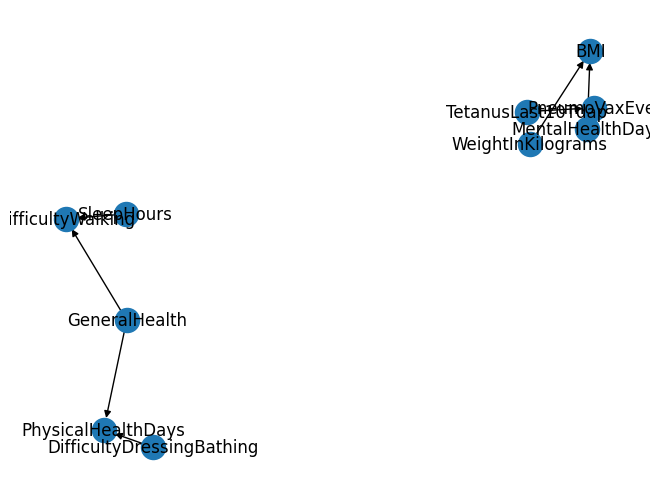

In [5]:
graph = nx.DiGraph(best_model_pc.edges())

nx.draw(graph, with_labels=True)